In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/electricity_bill_dataset.csv.zip')
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [4]:
df.shape

(45345, 12)

In [5]:
df.size

544140

In [6]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [7]:
df['AirConditioner'].value_counts()

,count
AirConditioner,
2.0,11474
1.0,11328
3.0,11307
0.0,11236


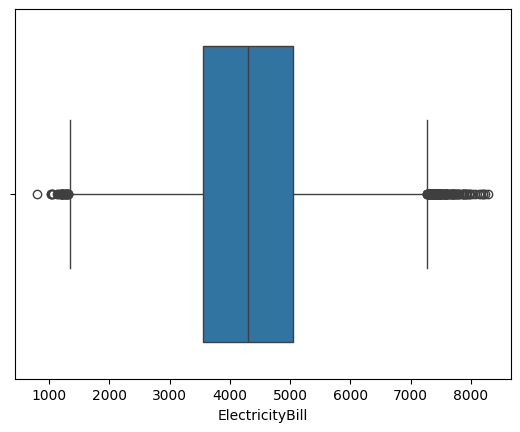

In [8]:
sns.boxplot(x=df['ElectricityBill'])
plt.show()

In [9]:
df.isnull().sum()

,0
Fan,0
Refrigerator,0
AirConditioner,0
Television,0
Monitor,0
MotorPump,0
Month,0
City,0
Company,0
MonthlyHours,0


In [10]:
df_dumm = pd.get_dummies(df, columns=['City', 'Company'], drop_first=True)
df1 = df_dumm.drop(['ElectricityBill'], axis=1)

x = pd.get_dummies(df1, drop_first=True)
y = df['ElectricityBill']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.intercept_

np.float64(-3903.674540214515)

In [27]:
model.coef_

array([ 3.68010744e-03,  4.11141169e-01,  1.89892500e-02, -1.18240912e-01,
        1.04193982e-01,  5.68434189e-14,  1.01687375e-03,  8.37064983e+00,
        4.62586038e+02,  4.77998970e+01, -1.23175111e+01,  1.01819668e+01,
        1.99306077e+01,  2.52857598e+01,  4.22840604e+01,  6.94227341e+01,
        5.32344595e+01,  7.18836520e+01,  3.06282460e+01,  1.55121010e+01,
        6.33194486e+01, -2.72026457e+01, -1.06180529e+01, -5.32136449e+00,
        1.73665387e+00, -7.34883962e-01,  1.71717875e+00, -3.28056484e+00,
        2.24054375e+00, -2.15954609e+00,  6.21189792e-01, -1.76167267e+00,
       -2.90912285e+00, -1.03123171e+00, -1.52183961e+00, -3.40209477e+00,
        1.85327434e+00,  8.77407459e-01,  2.03983185e+00, -7.70580890e-01,
       -1.21579740e+00,  2.02809889e+00,  2.21884055e+00, -2.88564917e+00,
        7.77793893e-01, -2.91709491e+00,  2.03441354e+00,  3.70752788e+00,
        1.65549019e+00, -3.00458021e+00,  2.86362611e-01, -3.32917361e+00,
        2.36125342e+00, -

In [26]:
train_predictions=model.predict(x_train)
test_predictions=model.predict(x_test)

In [28]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=10)
model.fit(x_train,y_train)

Lasso(alpha=10)

In [25]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data:",mean_absolute_error(y_test,test_predictions))
print("MAE for train data:",mean_absolute_error(y_train,train_predictions))

MAE for test data: 48.65065371950155
MAE for train data: 49.113943473574096


In [24]:
from sklearn.metrics import mean_squared_error
print("MSE for test data:",mean_squared_error(y_test,test_predictions))
print("MSE for train data:",mean_squared_error(y_train,train_predictions))

MSE for test data: 4895.306532217375
MSE for train data: 5031.649552221765


In [21]:
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,test_predictions))
print("R2 for train data:",r2_score(y_train,train_predictions))

R2 for test data: 0.9957727635404385
R2 for train data: 0.9956320995187297


In [22]:
print("RMSE for test data:",(np.sqrt(mean_squared_error(y_test,test_predictions))))
print("RMSE for train data:",(np.sqrt(mean_squared_error(y_train,train_predictions))))

RMSE for test data: 69.96646719834706
RMSE for train data: 70.93412121272642


In [23]:
df=pd.DataFrame({'MLR':['LR','LA'],
                 'MAE':[48.65,50.05],
                 'MSE':[4895,5191],
                 'R2':[0.99,0.99],
                 'RMSE':[0.96,0.72]
                 })
df

,MLR,MAE,MSE,R2,RMSE
0,LR,48.65,4895,0.99,0.96
1,LA,50.05,5191,0.99,0.72


In [29]:
from joblib import dump
dump(model,'electricity_bill_prediction.joblib')

['electricity_bill_prediction.joblib']

In [30]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)

model = PolynomialFeatures()
model.fit(x_train_poly, y_train)

PolynomialFeatures()